# Student Admission Classification with Logistic Regression

### 1. Import libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### 2. Load dataset

In [41]:
file_path = r"C:\Users\bbuser\Desktop\Jupyter\student_admission_dataset.csv"
df = pd.read_csv(file_path)

df.head() # Check the first few rows

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted


In [45]:
# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

In [46]:
print(df.head())

    GPA  SAT_Score  Extracurricular_Activities Admission_Status
0  3.46       1223                           8         Rejected
1  2.54        974                           8         Rejected
2  2.91        909                           9         Rejected
3  2.83       1369                           5         Accepted
4  3.60       1536                           7         Accepted


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


### 3. Separate features and target

In [32]:
df.columns

Index(['GPA', 'SAT_Score', 'Extracurricular_Activities', 'Admission_Status'], dtype='object')

In [50]:
le = LabelEncoder()

# Encode categories to numbers
df['Admission_Status'] = le.fit_transform(df['Admission_Status'])

In [66]:
#Identify Features & Label

X = df[['GPA', 'SAT_Score']]   # 2 features for visualization
y = df['Admission_Status']     # target (0 = Not Admitted, 1 = Admitted)

X.head()
y.value_counts()


Admission_Status
2    88
1    81
0    81
Name: count, dtype: int64

### 4. Visualize the data

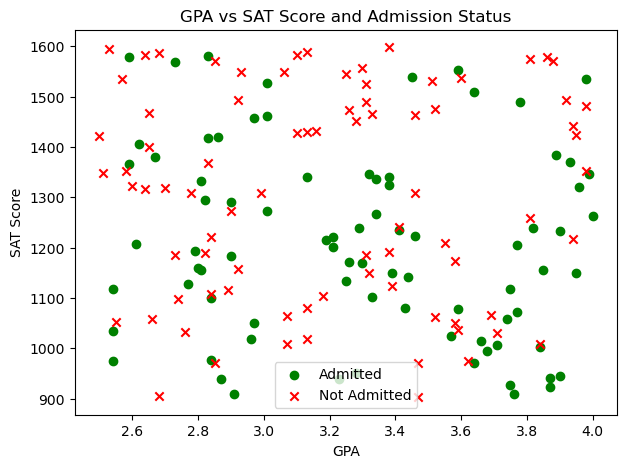

In [54]:
# Split dataset into admitted vs not admitted
admitted = df[df['Admission_Status'] == 1]
not_admitted = df[df['Admission_Status'] == 0]

# Plot
plt.figure(figsize=(7,5))
plt.scatter(admitted['GPA'], admitted['SAT_Score'], c='green', marker='o', label='Admitted')
plt.scatter(not_admitted['GPA'], not_admitted['SAT_Score'], c='red', marker='x', label='Not Admitted')

plt.xlabel("GPA")
plt.ylabel("SAT Score")
plt.legend()
plt.title("GPA vs SAT Score and Admission Status")
plt.show()

### 5. Split into training and test sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 6. Train logistic regression model

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 7. Evaluate

In [69]:
print(hasattr(logreg, "coef_"))

True


Accuracy: 0.5


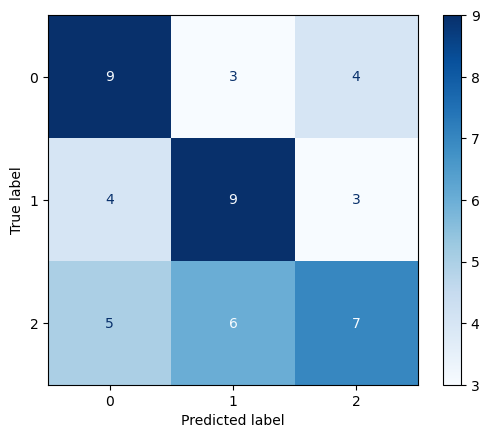

In [70]:
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.show()

### 8. Plot decision boundary

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


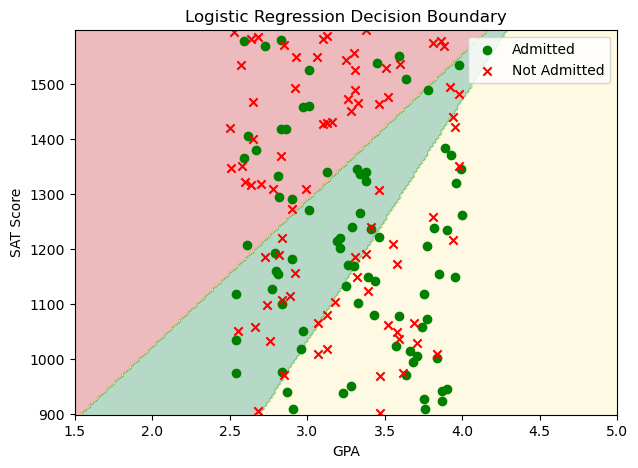

In [71]:
x_min, x_max = X['GPA'].min() - 1, X['GPA'].max() + 1
y_min, y_max = X['SAT_Score'].min() - 1, X['SAT_Score'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)

admitted = df[df['Admission_Status'] == 1]
not_admitted = df[df['Admission_Status'] == 0]

plt.scatter(admitted['GPA'], admitted['SAT_Score'], c='green', marker='o', label='Admitted')
plt.scatter(not_admitted['GPA'], not_admitted['SAT_Score'], c='red', marker='x', label='Not Admitted')

plt.xlabel("GPA")
plt.ylabel("SAT Score")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()